In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv('Salaries.csv')

In [25]:
data.fillna(value=0,inplace=True)

In [26]:
data.info

<bound method DataFrame.info of             Id       EmployeeName  \
0            1     NATHANIEL FORD   
1            2       GARY JIMENEZ   
2            3     ALBERT PARDINI   
3            4  CHRISTOPHER CHONG   
4            5    PATRICK GARDNER   
...        ...                ...   
148649  148650      Roy I Tillery   
148650  148651       Not provided   
148651  148652       Not provided   
148652  148653       Not provided   
148653  148654          Joe Lopez   

                                              JobTitle    BasePay  \
0       GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  167411.18   
1                      CAPTAIN III (POLICE DEPARTMENT)  155966.02   
2                      CAPTAIN III (POLICE DEPARTMENT)  212739.13   
3                 WIRE ROPE CABLE MAINTENANCE MECHANIC   77916.00   
4         DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)  134401.60   
...                                                ...        ...   
148649                                  

In [27]:
data.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,0.0,San Francisco,0.0
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,0.0,San Francisco,0.0
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,0.0,San Francisco,0.0
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,0.0,San Francisco,0.0
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,0.0,San Francisco,0.0


In [53]:
167411.18+400184.25

567595.4299999999

In [28]:
X = data[['BasePay', 'OvertimePay', 'OtherPay']]
y = data['TotalPayBenefits']

In [29]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [55]:
X_train

,BasePay,OvertimePay,OtherPay
730,173160.17,0.00,4927.50
116692,116584.02,5676.84,6146.50
86247,90693.06,0.00,648.00
56212,63261.20,0.00,4677.64
64188,36567.41,0.00,2292.45
...,...,...,...
87684,64945.19,18143.24,1413.91
148429,214.00,0.00,5.02
55293,77005.59,0.00,0.00
49751,84789.25,0.00,0.00


In [56]:
y_train

730       178087.67
116692    166770.63
86247     123161.23
56212      95053.46
64188      45947.44
            ...    
87684     116218.25
148429       221.21
55293      98937.77
49751     120263.20
136767     70235.02
Name: TotalPayBenefits, Length: 118923, dtype: float64

In [57]:
X_test

,BasePay,OvertimePay,OtherPay
82208,82681.50,21691.94,7744.82
89725,78925.01,367.70,615.00
102402,24562.66,0.00,4599.31
23995,48238.41,2099.78,1833.75
8081,100507.30,0.00,6285.30
...,...,...,...
32162,8323.01,0.00,0.00
50202,83428.44,0.00,0.00
136924,45264.11,0.00,0.00
35653,323.29,281.78,0.00


In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lm = LinearRegression()

In [60]:
lm.fit(X_train,y_train)

LinearRegression()

In [61]:
predictions = lm.predict(X_test)

In [62]:
predictions = np.round(predictions,2)

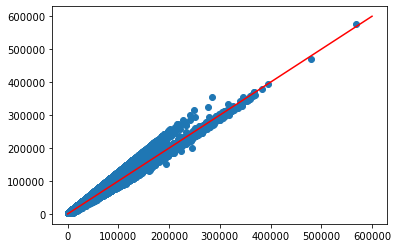

In [63]:
plt.scatter(y_test,predictions)
plt.plot(range(600000),range(600000),'r')

In [64]:
from sklearn import metrics

In [65]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 10208.630744677273


In [66]:
metrics.mean_absolute_error(y_test, predictions)/predictions.mean()

0.10818852384283936

remove OvertimePay is NaN

In [75]:
data = pd.read_csv('Salaries.csv')

In [76]:
data.info

<bound method DataFrame.info of             Id       EmployeeName  \
0            1     NATHANIEL FORD   
1            2       GARY JIMENEZ   
2            3     ALBERT PARDINI   
3            4  CHRISTOPHER CHONG   
4            5    PATRICK GARDNER   
...        ...                ...   
148649  148650      Roy I Tillery   
148650  148651       Not provided   
148651  148652       Not provided   
148652  148653       Not provided   
148653  148654          Joe Lopez   

                                              JobTitle    BasePay  \
0       GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  167411.18   
1                      CAPTAIN III (POLICE DEPARTMENT)  155966.02   
2                      CAPTAIN III (POLICE DEPARTMENT)  212739.13   
3                 WIRE ROPE CABLE MAINTENANCE MECHANIC   77916.00   
4         DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)  134401.60   
...                                                ...        ...   
148649                                  

In [77]:
newdata = data[['BasePay', 'OvertimePay', 'OtherPay','TotalPayBenefits']].copy()

In [78]:
newdata.info

<bound method DataFrame.info of           BasePay  OvertimePay   OtherPay  TotalPayBenefits
0       167411.18         0.00  400184.25         567595.43
1       155966.02    245131.88  137811.38         538909.28
2       212739.13    106088.18   16452.60         335279.91
3        77916.00     56120.71  198306.90         332343.61
4       134401.60      9737.00  182234.59         326373.19
...           ...          ...        ...               ...
148649       0.00         0.00       0.00              0.00
148650        NaN          NaN        NaN              0.00
148651        NaN          NaN        NaN              0.00
148652        NaN          NaN        NaN              0.00
148653       0.00         0.00    -618.13           -618.13

[148654 rows x 4 columns]>

In [80]:
newdata.dropna(inplace= True)

In [81]:
newdata.info

<bound method DataFrame.info of           BasePay  OvertimePay   OtherPay  TotalPayBenefits
0       167411.18         0.00  400184.25         567595.43
1       155966.02    245131.88  137811.38         538909.28
2       212739.13    106088.18   16452.60         335279.91
3        77916.00     56120.71  198306.90         332343.61
4       134401.60      9737.00  182234.59         326373.19
...           ...          ...        ...               ...
148645       0.00         0.00       0.00              0.00
148647       0.00         0.00       0.00              0.00
148648       0.00         0.00       0.00              0.00
148649       0.00         0.00       0.00              0.00
148653       0.00         0.00    -618.13           -618.13

[148045 rows x 4 columns]>

In [87]:
X = newdata[['BasePay', 'OvertimePay', 'OtherPay']]
y = newdata['TotalPayBenefits']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [89]:
lm = LinearRegression()

In [90]:
lm.fit(X_train,y_train)

LinearRegression()

In [91]:
predictions = lm.predict(X_test)

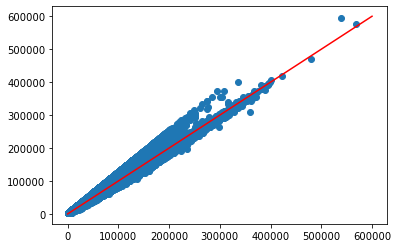

In [92]:
predictions = np.round(predictions,2)
plt.scatter(y_test,predictions)

plt.plot(range(600000),range(600000),'r')

In [93]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 10185.102051065553


In [94]:
metrics.mean_absolute_error(y_test, predictions)/predictions.mean()

0.10783589161711057